In [643]:
# The algo predicts if tomorrow the stock will go up or down from today's closing price
#dependencies 
import yfinance as yf
import pandas as pd
import os
import finta

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [644]:
#getting the data from Yahoo Finance
ticker = 'AAPL'
stock = yf.Ticker(ticker)
stock = stock.history(period="max")

#creating a csv file with the stock prices
stock.to_csv(ticker +'.csv')

In [645]:
stock.index = pd.to_datetime(stock.index)
stock.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0
1980-12-19 00:00:00-05:00,0.097116,0.097545,0.097116,0.097116,48630400,0.0,0.0
1980-12-22 00:00:00-05:00,0.101842,0.102273,0.101842,0.101842,37363200,0.0,0.0
1980-12-23 00:00:00-05:00,0.106140,0.106570,0.106140,0.106140,46950400,0.0,0.0
1980-12-24 00:00:00-05:00,0.111726,0.112156,0.111726,0.111726,48003200,0.0,0.0


<Axes: xlabel='Date'>

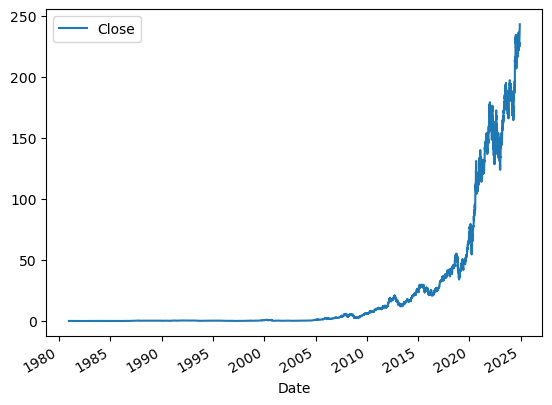

In [646]:
#visualizing the stock chart
stock.plot.line(y='Close', use_index=True)

In [647]:
#Cleaning the data: deleting the 2 columns we don't need
del stock['Dividends']
del stock['Stock Splits']

In [648]:
#Setting up the target (Tomorrow)
#creating a new column "Tomorrow" from the previous day's "Close" price 
stock["Tomorrow"] = stock["Close"].shift(-1)

In [649]:
#Checking if "Tomorrow" price is greater than today's ("Close") price
stock["Target"] = (stock["Tomorrow"] > stock["Close"]).astype(int) #returns 0 for going DOWN and 1 for going UP
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.093678,0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.086802,0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.088951,1
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.091530,1
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.097116,1
...,...,...,...,...,...,...,...
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,237.330002,1
2024-11-29 00:00:00-05:00,234.809998,237.809998,233.970001,237.330002,28481400,239.589996,1
2024-12-02 00:00:00-05:00,237.270004,240.789993,237.160004,239.589996,48137100,242.649994,1


In [650]:
#eliminating data that is too old to be relevant (before 2000)
stock = stock.loc["1990-01-01":].copy()
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248055,0.263889,0.246296,0.262129,183198400,0.263889,1
1990-01-03 00:00:00-05:00,0.267408,0.267408,0.263889,0.263889,207995200,0.264769,1
1990-01-04 00:00:00-05:00,0.269167,0.272685,0.262129,0.264769,221513600,0.265649,1
1990-01-05 00:00:00-05:00,0.265649,0.269167,0.260370,0.265649,123312000,0.267408,1
1990-01-08 00:00:00-05:00,0.263889,0.267408,0.260370,0.267408,101572800,0.264769,0
...,...,...,...,...,...,...,...
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,237.330002,1
2024-11-29 00:00:00-05:00,234.809998,237.809998,233.970001,237.330002,28481400,239.589996,1
2024-12-02 00:00:00-05:00,237.270004,240.789993,237.160004,239.589996,48137100,242.649994,1


In [651]:
# Training the model 

model = RandomForestClassifier(n_estimators=400, min_samples_split=300, random_state=1)

#spliting the dataset in training and testing subsets
train = stock.iloc[:-100]
test = stock.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=300, n_estimators=400, random_state=1)

In [652]:
#measuring the model's accuracy

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.57

<Axes: xlabel='Date'>

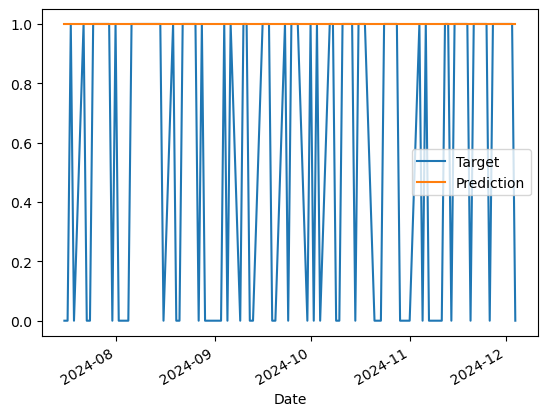

In [653]:
#Ploting the predictions vs the actual results
preds.name = "Prediction"
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()


In [654]:
#BACK TESTING 
#Creating a function that returns a data frame with the target and predictions for the test data
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
combined


,Target,Prediction
Date,,
2024-07-16 00:00:00-04:00,0,1
2024-07-17 00:00:00-04:00,0,1
2024-07-18 00:00:00-04:00,1,1
2024-07-19 00:00:00-04:00,0,1
2024-07-22 00:00:00-04:00,1,1
...,...,...
2024-11-27 00:00:00-05:00,1,1
2024-11-29 00:00:00-05:00,1,1
2024-12-02 00:00:00-05:00,1,1


In [655]:
#creating a function that takes the data from past 5 years, trains the model, than it keeps adding 1 year (step=250)

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)


In [701]:
#back testing using the 2 functions that were just defined
predictions = backtest(stock, model, predictors)


In [702]:
#Checking the count of the 2 types of predictions
predictions["Predictions"].value_counts()

Predictions
0.0    5021
1.0    1078
Name: count, dtype: int64

In [658]:
#Checking the accuracy
precision_score(predictions["Target"], predictions["Predictions"])

0.5249865663621709

In [659]:
#Checking the actual market (0=went down, 1=went up)
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.52294
0    0.47706
Name: count, dtype: float64

In [660]:
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248055,0.263889,0.246296,0.262129,183198400,0.263889,1
1990-01-03 00:00:00-05:00,0.267408,0.267408,0.263889,0.263889,207995200,0.264769,1
1990-01-04 00:00:00-05:00,0.269167,0.272685,0.262129,0.264769,221513600,0.265649,1
1990-01-05 00:00:00-05:00,0.265649,0.269167,0.260370,0.265649,123312000,0.267408,1
1990-01-08 00:00:00-05:00,0.263889,0.267408,0.260370,0.267408,101572800,0.264769,0
...,...,...,...,...,...,...,...
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,237.330002,1
2024-11-29 00:00:00-05:00,234.809998,237.809998,233.970001,237.330002,28481400,239.589996,1
2024-12-02 00:00:00-05:00,237.270004,240.789993,237.160004,239.589996,48137100,242.649994,1


In [661]:
#Adding new predictors to the model. The SMA 5, 50, 200
from finta import TA
scopes = [5,50,200]
sma = 0 
new_predictors = []
new_predictors += ["Open", "High", "Low", "Close", "RSI"]

for scope in scopes:
#adding SMA column   
        SMA_scope = f'SMA_{scope}'

        sma = TA.SMA(stock, scope)
        stock[SMA_scope] = sma

#adding a column for the ratio close/sma
        ratio_column = f'Close_Ratio_{scope}'
        stock[ratio_column] = stock["Close"] / sma
  
#adding a column for RSI
        stock['RSI'] = TA.RSI(stock)
 

#Ading the trend as numbers of days that the stock went up over the scope 
        trend_column = f"Trend_{scope}"
        stock[trend_column] = stock.shift(1).rolling(scope).sum()["Target"]

#Adding the new predictors

        new_predictors += [SMA_scope, ratio_column, trend_column]
    


new_predictors
#stock.head(25)

['Open',
 'High',
 'Low',
 'Close',
 'RSI',
 'SMA_5',
 'Close_Ratio_5',
 'Trend_5',
 'SMA_50',
 'Close_Ratio_50',
 'Trend_50',
 'SMA_200',
 'Close_Ratio_200',
 'Trend_200']

In [662]:
#Cleaning the rows with N/A
stock = stock.dropna(subset=stock.columns[stock.columns != "Tomorrow"])
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target', 'SMA_5',
       'Close_Ratio_5', 'RSI', 'Trend_5', 'SMA_50', 'Close_Ratio_50',
       'Trend_50', 'SMA_200', 'Close_Ratio_200', 'Trend_200'],
      dtype='object')

In [663]:
#updating/tuning the model again
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [664]:
#changing the "predict" function to "predict_proba" to redefine what qualifies as 0 and 1 (UP or Down)
#that will descrease the number of days the stock is predicted to go up, but it will increase the probability of going UP
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.55] = 1
    preds[preds <.55] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [665]:
#backtesting 
predictions = backtest(stock, model, new_predictors)
predictions

,Target,Predictions
Date,,
2000-09-07 00:00:00-04:00,0,1.0
2000-09-08 00:00:00-04:00,0,1.0
2000-09-11 00:00:00-04:00,0,1.0
2000-09-12 00:00:00-04:00,1,1.0
2000-09-13 00:00:00-04:00,0,1.0
...,...,...
2024-11-27 00:00:00-05:00,1,1.0
2024-11-29 00:00:00-05:00,1,1.0
2024-12-02 00:00:00-05:00,1,1.0


In [666]:
predictions["Predictions"].value_counts()

Predictions
0.0    5059
1.0    1040
Name: count, dtype: int64

In [667]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5211538461538462

In [668]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.522709
0    0.477291
Name: count, dtype: float64